<a href="https://colab.research.google.com/github/dabodobo/Sistemas-Inteligentes/blob/main/Classification_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP check for the classification task

In [1]:
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
import joblib

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_ds(X_train, X_test, y_train, y_test):
    h = .02
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright);
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6);
    plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max());
    plt.xticks(()); plt.yticks(());

def plot_contour(net,X_train, X_test, y_train, y_test):
    h = .02
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = net.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    cm = plt.cm.RdBu
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

%matplotlib inline

## Upload files

In [2]:
from google.colab import files
files.upload()

Saving mlp_scaler.pkl to mlp_scaler.pkl
Saving mlp_net.pkl to mlp_net.pkl
Saving mlp_dataset.pkl to mlp_dataset.pkl


{'mlp_scaler.pkl': b'\x80\x04\x95\xad\x01\x00\x00\x00\x00\x00\x00\x8c\x1bsklearn.preprocessing._data\x94\x8c\x0eStandardScaler\x94\x93\x94)\x81\x94}\x94(\x8c\twith_mean\x94\x88\x8c\x08with_std\x94\x88\x8c\x04copy\x94\x88\x8c\x0en_features_in_\x94K\x02\x8c\x0fn_samples_seen_\x94\x8c\x16numpy._core.multiarray\x94\x8c\x06scalar\x94\x93\x94\x8c\x05numpy\x94\x8c\x05dtype\x94\x93\x94\x8c\x02i8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94bC\x08\x96\x00\x00\x00\x00\x00\x00\x00\x94\x86\x94R\x94\x8c\x05mean_\x94\x8c\x13joblib.numpy_pickle\x94\x8c\x11NumpyArrayWrapper\x94\x93\x94)\x81\x94}\x94(\x8c\x08subclass\x94h\r\x8c\x07ndarray\x94\x93\x94\x8c\x05shape\x94K\x02\x85\x94\x8c\x05order\x94\x8c\x01C\x94\x8c\x05dtype\x94h\x0f\x8c\x02f8\x94\x89\x88\x87\x94R\x94(K\x03h\x13NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x8c\nallow_mmap\x94\x88\x8c\x1bnumpy_array_alignment_bytes\x94K\x10ub\x07\xff\xff\xff\xff\xff\xff\xff\\]\xbeh\xd4\xde\xa3?\xb1\xe4S\x8b?\

## Load in the data

In [3]:
ds = joblib.load('mlp_dataset.pkl')
X, y = ds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

## Data scaling

You must load and use the scaler that was generated during training.

In [4]:
# Don't cheat - load the scaler from file
scaler = joblib.load('mlp_scaler.pkl')
# apply same transformation to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

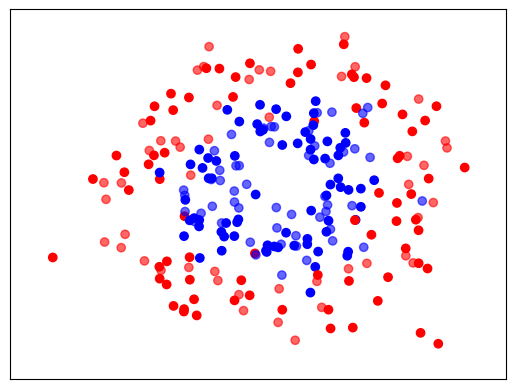

In [5]:
plot_ds(X_train, X_test, y_train, y_test)

## Load the network

In [6]:
net = joblib.load('mlp_net.pkl')

## Plot decision boundary

Plot the decision boundary as a contour plot. For that, we will assign a color to each point in the plane, which will be proportional to its probability of belonging to one class or the other.

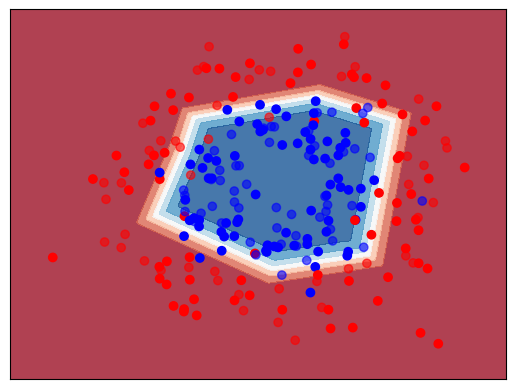

In [7]:
plot_contour(net, X_train, X_test, y_train, y_test)
plot_ds(X_train, X_test, y_train, y_test)

## Analysis of the network

Percentage of correct classification of the test data:

In [8]:
print('Score: %.2f' % (net.score(X_test, y_test)*100))

Score: 94.00


Is it *exactly* the same score that was obtained during the training? If not, guess why?